# Required packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as ctx
import geopandas as gpd

# SEIR model parameters

In [76]:
#Number of regions
regions = 10

#Population movement between regions，this is a sample data created with numpy
flow = np.ones([2,regions, regions], dtype=int)

#Population by region，this is a sample data created with numpy
pop  = pop = np.full(regions, 3000)

#Inital cases
initial = np.random.rand(10)

#Reproduction Number
R0 = 2.4

#Population mobility
alpha = np.ones(10)

#Incubation Period
lengthOfIncubationPeriod = 4

#Treatment Period
lengthOfTreatment  = 7

#Number of iterations
iterations = 60

#SEIR compartment
Svec = pop.copy()
Evec = np.zeros(regions)
Ivec = np.zeros(regions)
Rvec = np.zeros(regions)

# SEIR Model example

In [78]:

history = np.zeros((iterations, 4, regions))
history[0, 0, :] = Svec
history[0, 1, :] = Evec
history[0, 2, :] = Ivec
history[0, 3, :] = Rvec
N = pop.sum()

# 
for i in range(0, iterations ):
    realOD = flow[i % 2]
    newE = Svec * Ivec * R0 * alpha
    newI = Evec / lengthOfIncubationPeriod
    newR = Ivec / lengthOfTreatment

    if i > 0:
        realOD  = flow[1%2]
        row_sums = initial.sum()
        Ivec_n = Ivec / row_sums
        infected_mat = np.array([Ivec_n, ] * 10).transpose()
        infected_mat = np.log(infected_mat + 1)
        OD_infected = np.round(realOD * infected_mat)
        inflow_infected = OD_infected.sum(axis=0) * 0.02

        peopleInfectedNormal = Svec * 0.3 * eff * alpha
        peopleconvert = Evec / lengthOfIncubationPeriod
        peopleconvert = np.round(peopleconvert)

        peoplerecover = Ivec / lengthOfTreatment

        Svec = Svec - peopleInfectedNormal
        Svec = np.round(Svec)

        Evec = Evec + peopleInfectedNormal - peopleconvert
        Evec = np.round(Evec)

        Ivec = Ivec + peopleconvert - peoplerecover
        Ivec = np.round(Ivec)
        Rvec = Rvec + peoplerecover
        Rvec = np.round(Rvec)
   
        history[iterations-1 ,0,:] = Svec
        history[iterations-1 ,1,:] = Evec
        history[iterations-1 ,2,:] = Ivec
        history[iterations-1 ,3,:] = Rvec

# Mapping

In [86]:
#Read shp file
shp = r'./shp/sz.shp'
sz = gpd.GeoDataFrame.from_file(shp,encoding = 'utf-8')

In [87]:
sz


,centroid_x,centroid_y,qh,geometry
0,114.143157,22.577605,罗湖,"POLYGON ((114.10006 22.53431, 114.09969 22.535..."
1,114.041535,22.546180,福田,"POLYGON ((113.98578 22.51348, 113.98558 22.523..."
2,114.270206,22.596432,盐田,"POLYGON ((114.22772 22.54290, 114.22643 22.543..."
3,113.851387,22.679120,宝安,"MULTIPOLYGON (((113.81831 22.54676, 113.81816 ..."
4,113.926290,22.766157,光明,"POLYGON ((113.98587 22.80304, 113.98605 22.802..."
5,114.356936,22.691020,坪山,"POLYGON ((114.42581 22.66510, 114.42470 22.664..."
6,114.029687,22.686910,龙华,"POLYGON ((114.10825 22.72368, 114.10785 22.723..."
7,113.930714,22.544103,南山,"MULTIPOLYGON (((113.81491 22.39929, 113.80914 ..."
8,114.502205,22.571337,大鹏,"POLYGON ((114.33439 22.62610, 114.33450 22.626..."
9,114.206790,22.695694,龙岗,"POLYGON ((114.06646 22.59544, 114.06635 22.595..."


In [91]:
sz.crs = 'EPSG:4326'
sz = sz.to_crs(epsg=3857)


,centroid_x,centroid_y,qh,geometry
0,114.143157,22.577605,罗湖,"POLYGON ((12701560.611 2575797.495, 12701519.4..."
1,114.041535,22.546180,福田,"POLYGON ((12688838.728 2573287.198, 12688816.2..."
2,114.270206,22.596432,盐田,"POLYGON ((12715772.008 2576833.301, 12715627.6..."
3,113.851387,22.679120,宝安,"MULTIPOLYGON (((12670196.544 2577298.510, 1267..."
4,113.926290,22.766157,光明,"POLYGON ((12688849.204 2608217.455, 12688869.3..."
5,114.356936,22.691020,坪山,"POLYGON ((12737823.066 2591568.078, 12737699.7..."
6,114.029687,22.686910,龙华,"POLYGON ((12702471.943 2598636.960, 12702427.6..."
7,113.930714,22.544103,南山,"MULTIPOLYGON (((12669817.540 2559532.423, 1266..."
8,114.502205,22.571337,大鹏,"POLYGON ((12727646.106 2586863.558, 12727658.7..."
9,114.206790,22.695694,龙岗,"POLYGON ((12697820.568 2583166.469, 12697808.2..."


In [92]:
#Here we use numpy to create the resulting data for the final data simulation

res = np.random.randint(low=1, high=100, size=len(sz))
sz['res'] = res
sz

,centroid_x,centroid_y,qh,geometry,res
0,114.143157,22.577605,罗湖,"POLYGON ((12701560.611 2575797.495, 12701519.4...",60
1,114.041535,22.546180,福田,"POLYGON ((12688838.728 2573287.198, 12688816.2...",21
2,114.270206,22.596432,盐田,"POLYGON ((12715772.008 2576833.301, 12715627.6...",48
3,113.851387,22.679120,宝安,"MULTIPOLYGON (((12670196.544 2577298.510, 1267...",77
4,113.926290,22.766157,光明,"POLYGON ((12688849.204 2608217.455, 12688869.3...",37
5,114.356936,22.691020,坪山,"POLYGON ((12737823.066 2591568.078, 12737699.7...",91
6,114.029687,22.686910,龙华,"POLYGON ((12702471.943 2598636.960, 12702427.6...",84
7,113.930714,22.544103,南山,"MULTIPOLYGON (((12669817.540 2559532.423, 1266...",19
8,114.502205,22.571337,大鹏,"POLYGON ((12727646.106 2586863.558, 12727658.7...",16
9,114.206790,22.695694,龙岗,"POLYGON ((12697820.568 2583166.469, 12697808.2...",2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

(2559532.422586614, 2615666.870927223)

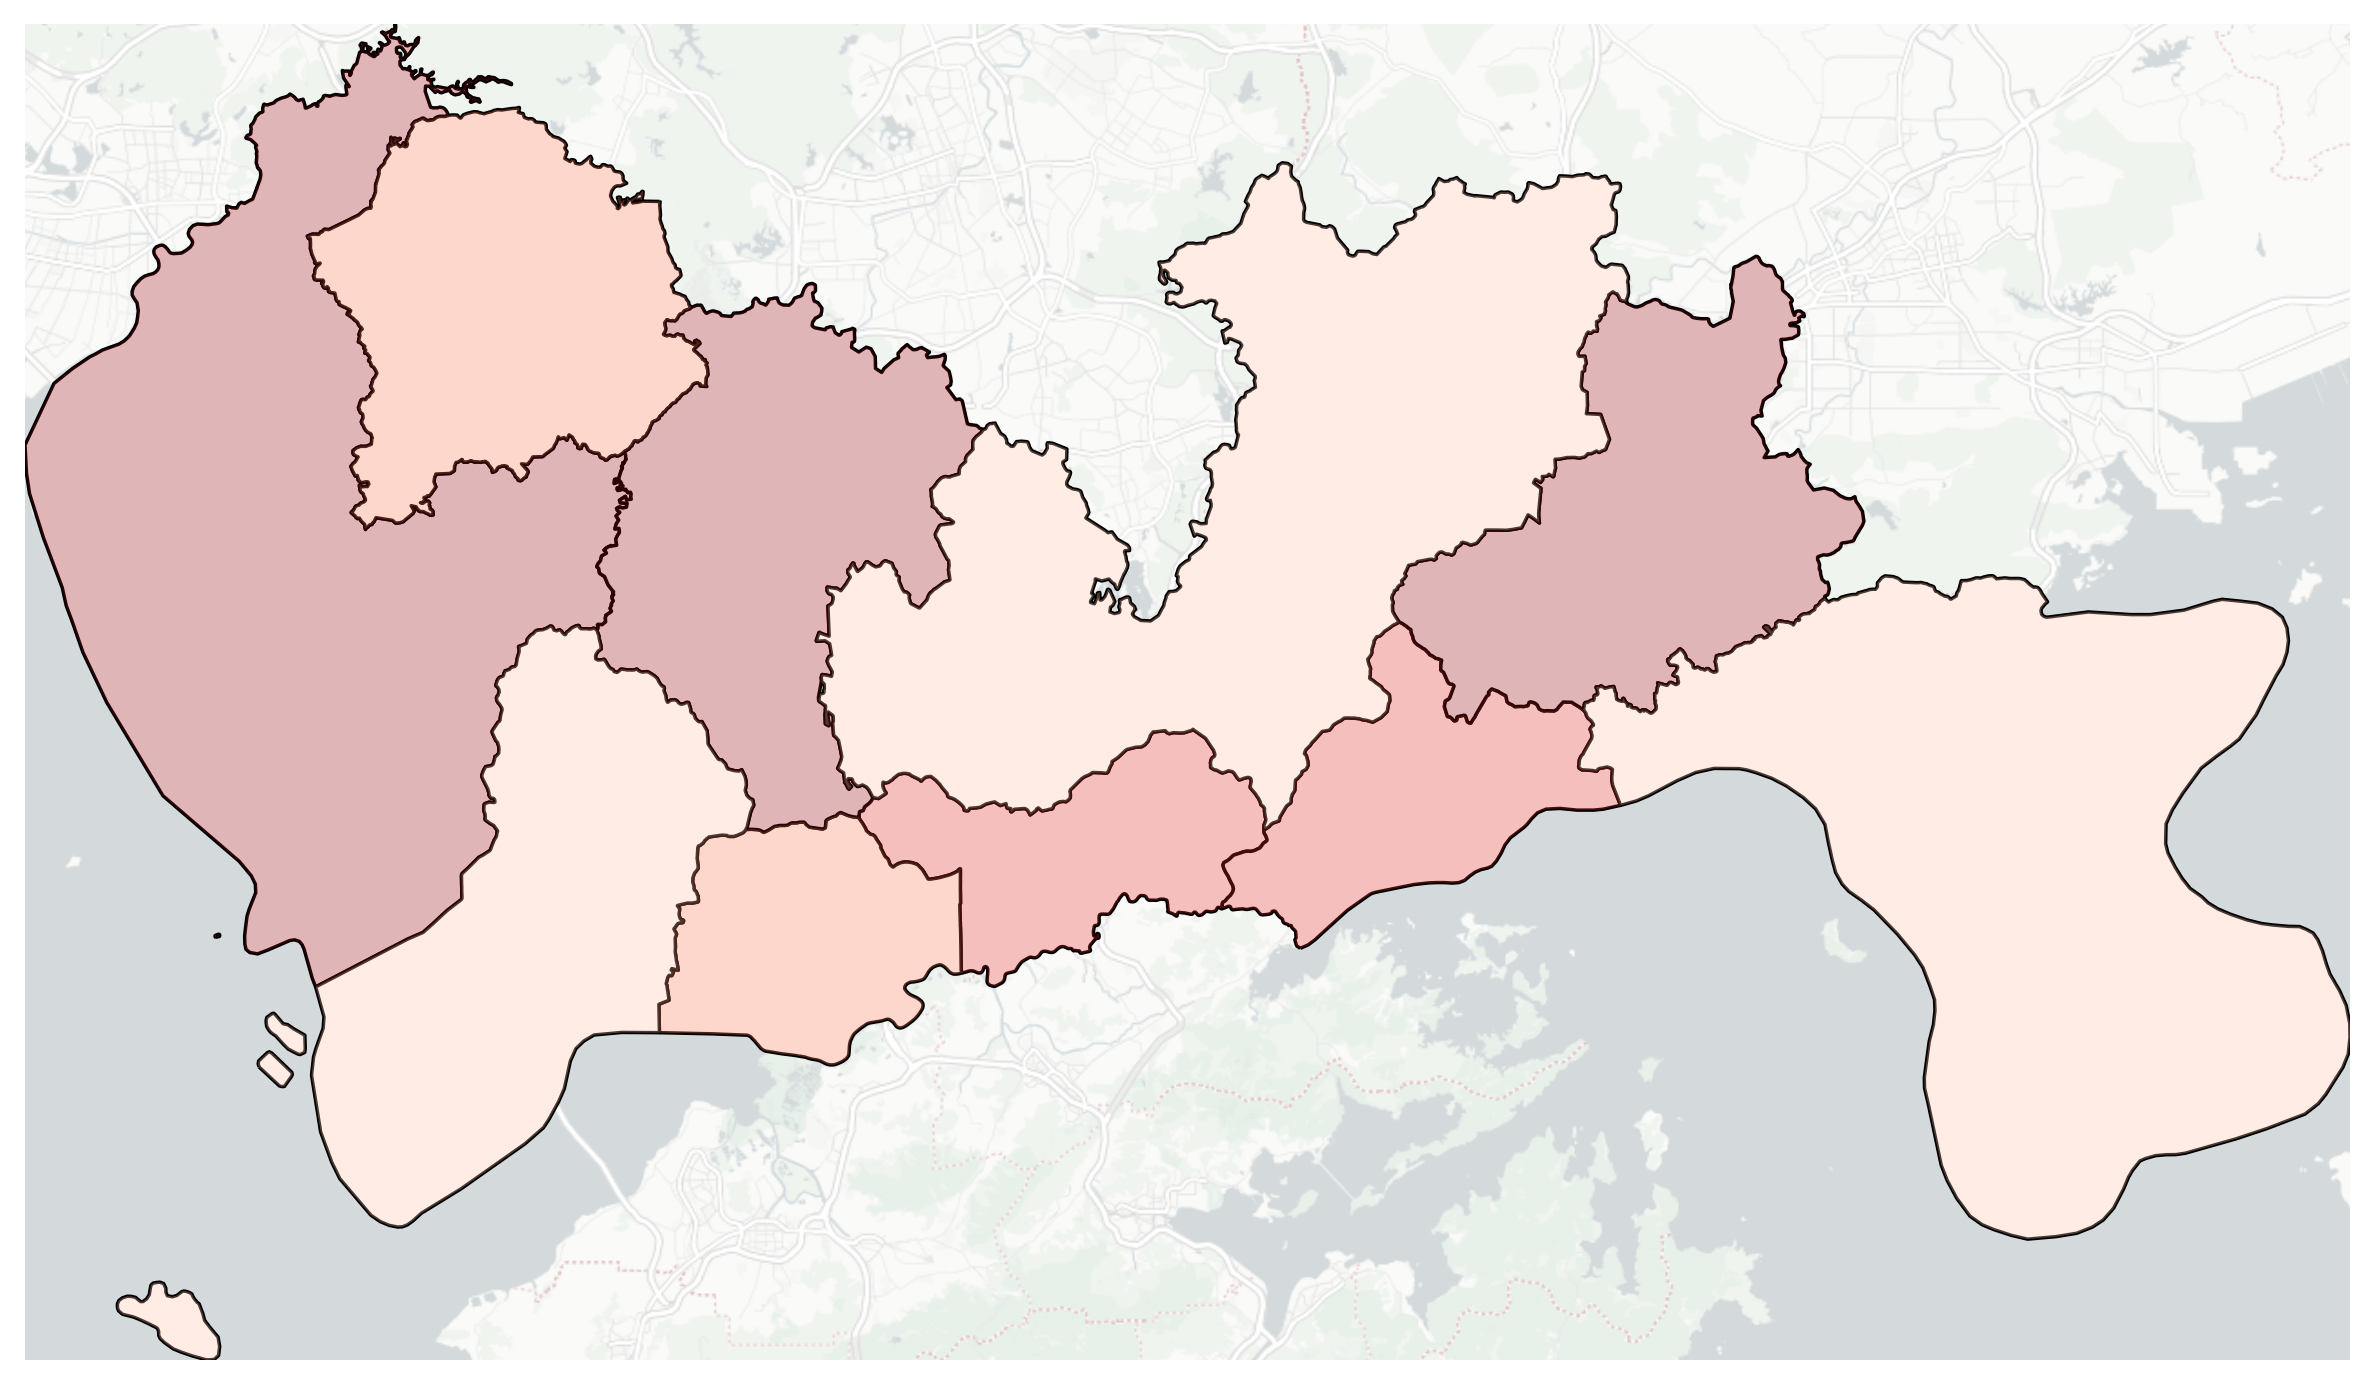

In [94]:
#Plot the final number of cases in each region
bounds = [113.6,22.4,114.73,22.9]
west, south, east, north = sz.unary_union.bounds
fig, ax = plt.subplots(figsize=(12, 12),dpi=250)
ax = sz.plot(ax=ax,
                                            facecolor="white",
                                            edgecolor='black',
                                            linewidth=1,
                                            linestyle='-',
                                            alpha=1)

from matplotlib.colors import LinearSegmentedColormap
def trunc_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list('trunc({n}, {a:.2f}, {b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
                                                cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('Reds')
new_cmap = trunc_colormap(cmap, 0.0, .9)
sz.plot(ax=ax, column='res', cmap=new_cmap, zorder=3,alpha=0.3,scheme='BoxPlot')

plt.axis('off')


ctx.add_basemap(ax,
            source='https://d.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png',
            zoom='auto')
ax.set_xlim(west, east)
ax.set_ylim(south, north)